<a href="https://colab.research.google.com/github/rajskar/um_P710/blob/main/LinearRegression/LR_MSEvsMAE_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated Coefficients:
  MSE Model: Intercept=4.5471, Slope=2.5255
  MAE Model: Intercept=4.2990, Slope=2.6799


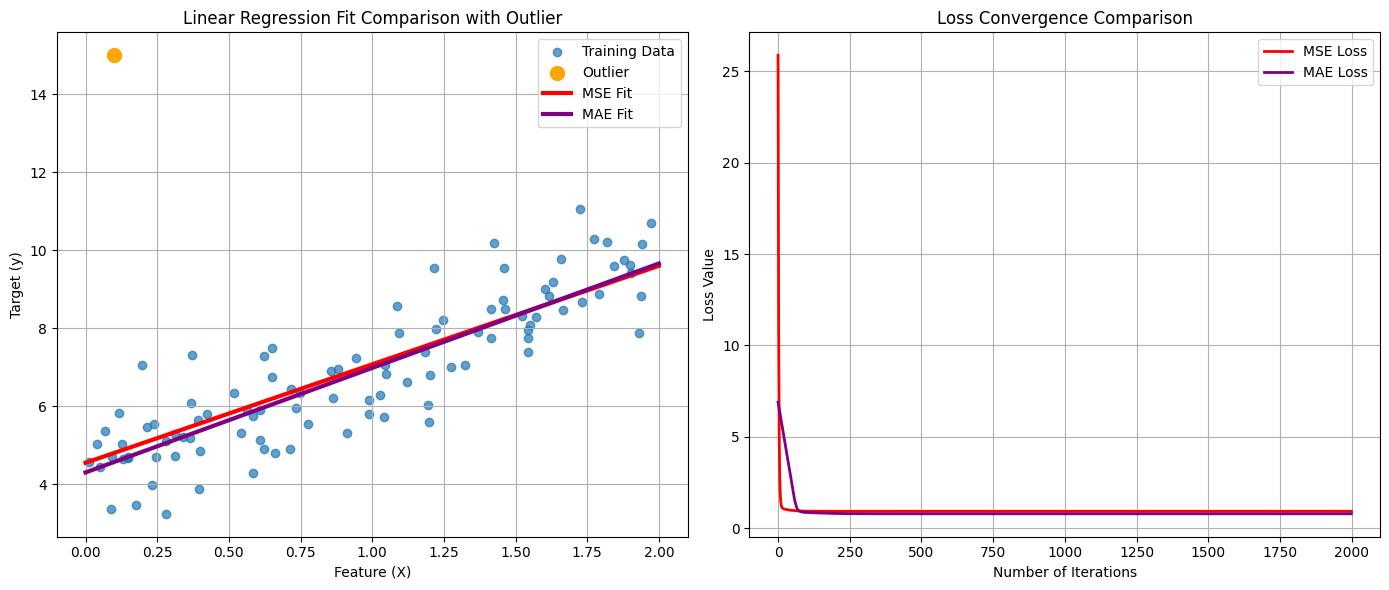

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function to solve with Gradient Descent using Mean Squared Error (MSE) ---
def gradient_descent_mse_solve(X, y, learning_rate=0.1, n_iterations=1000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Squared Error (MSE).
    """
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mse_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MSE Calculation
        mse = np.sum(error**2) / (2 * m)
        mse_history.append(mse)

        # MSE Gradient Calculation
        gradients = X_b.T @ error / m
        beta = beta - learning_rate * gradients

    return beta, mse_history

# --- Function to solve with Gradient Descent using Mean Absolute Error (MAE) ---
def gradient_descent_mae_solve(X, y, learning_rate=0.05, n_iterations=1000):
    """
    Calculates the coefficients for a linear regression model
    using Gradient Descent to minimize the Mean Absolute Error (MAE).
    """
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    beta = np.zeros((X_b.shape[1], 1))
    mae_history = []

    for iteration in range(n_iterations):
        y_pred = X_b @ beta
        error = y_pred - y

        # MAE Calculation
        mae = np.sum(np.abs(error)) / m
        mae_history.append(mae)

        # MAE Gradient Calculation
        # The gradient is the sign of the error, not the error itself.
        gradients = X_b.T @ np.sign(error) / m
        beta = beta - learning_rate * gradients

    return beta, mae_history

# --- Step 2: Generate sample data with an outlier ---
np.random.seed(42)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)

# Add an outlier: a point with a low X value but a high Y value
outlier_x = np.array([[0.1]])
outlier_y = np.array([[15.0]])
X_train = np.vstack([X_train, outlier_x])
y_train = np.vstack([y_train, outlier_y])

# --- Step 3: Solve for coefficients using both MSE and MAE ---
# Use different learning rates to help both models converge well.
beta_mse, mse_history = gradient_descent_mse_solve(X_train, y_train, learning_rate=0.1, n_iterations=2000) # Increased iterations to help convergence with outlier
beta_mae, mae_history = gradient_descent_mae_solve(X_train, y_train, learning_rate=0.05, n_iterations=2000) # Increased iterations

# Check if the solutions were successful and extract coefficients
intercept_mse, slope_mse = beta_mse[0][0], beta_mse[1][0] if beta_mse is not None else (None, None)
intercept_mae, slope_mae = beta_mae[0][0], beta_mae[1][0] if beta_mae is not None else (None, None)

print("Calculated Coefficients:")
print(f"  MSE Model: Intercept={intercept_mse:.4f}, Slope={slope_mse:.4f}")
print(f"  MAE Model: Intercept={intercept_mae:.4f}, Slope={slope_mae:.4f}")

# --- Step 4: Visualize the results for comparison ---
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred_mse = intercept_mse + slope_mse * X_plot
y_pred_mae = intercept_mae + slope_mae * X_plot

plt.figure(figsize=(14, 6))

# Subplot 1: Data and Regression Lines
plt.subplot(1, 2, 1)
plt.scatter(X_train[:-1], y_train[:-1], label='Training Data', alpha=0.7)
plt.scatter(X_train[-1], y_train[-1], color='orange', s=100, label='Outlier')
plt.plot(X_plot, y_pred_mse, color='red', linewidth=3, label='MSE Fit')
plt.plot(X_plot, y_pred_mae, color='purple', linewidth=3, label='MAE Fit')
plt.title('Linear Regression Fit Comparison with Outlier')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)

# Subplot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(mse_history)), mse_history, color='red', linewidth=2, label='MSE Loss')
plt.plot(range(len(mae_history)), mae_history, color='purple', linewidth=2, label='MAE Loss')
plt.title('Loss Convergence Comparison')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
